<a href="https://colab.research.google.com/github/palakagl/CapstoneProject/blob/main/Insurance_Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import io

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pickle

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score,roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [70]:
train_df = pd.read_csv('life_insurance_train.csv')
train_df = train_df.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',train_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
train_df.head()


Number of rows and columns in the data set:  (41566, 127)



,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
2,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
3,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,0,0,0,0,0,0,0,0,0,8


In [71]:
test_df = pd.read_csv('life_insurance_test.csv')
test_df = test_df.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',test_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
test_df.head()


Number of rows and columns in the data set:  (17815, 126)



,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
1,1,D3,26,0.128205,2,3,1,0.537313,0.690909,0.309623,...,0,0,0,0,0,1,0,0,1,1
2,1,A2,26,0.102564,2,3,1,0.567164,0.618182,0.163180,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,26,0.230769,2,3,1,0.179104,0.800000,0.539749,...,0,0,0,0,0,0,0,0,0,0
4,1,A2,26,0.179487,2,3,1,0.164179,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y_test = pd.read_csv('response_test.csv')
y_test = y_test.drop('Id',axis=1)
print('\nNumber of rows and columns in the data set: ',y_test.shape)
print('')

#Lets look into top few rows and columns in the dataset
y_test.head()


Number of rows and columns in the data set:  (17815, 1)



,Response
0,4
1,6
2,7
3,2
4,8


In [ ]:
dtypes=pd.DataFrame(train_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train_df.nunique()
dtypes["Null Values"]=train_df.isnull().sum()
dtypes["% null Values"]=train_df.isnull().sum()/len(train_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

In [ ]:
dtypes=pd.DataFrame(test_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"] = test_df.nunique()
dtypes["Null Values"] = test_df.isnull().sum()
dtypes["% null Values"] = test_df.isnull().sum()/len(test_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

In [73]:
list_train = train_df.columns[train_df.isna().any()].tolist()

In [74]:
list_test =  test_df.columns[test_df.isna().any()].tolist()

In [75]:
for column in list_train:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

In [76]:
for column in list_test:
    test_df[column].fillna(test_df[column].mean(), inplace=True)

In [ ]:
# label encode the Product_Info_2 variable
train_df['Product_Info_2'] = LabelEncoder().fit_transform(train_df['Product_Info_2'])
test_df['Product_Info_2'] = LabelEncoder().fit_transform(test_df['Product_Info_2'])

In [ ]:
dtypes=pd.DataFrame(train_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train_df.nunique()
dtypes["Null Values"]=train_df.isnull().sum()
dtypes["% null Values"]=train_df.isnull().sum()/len(train_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

In [81]:
X_test = test_df

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train_df,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In [77]:
num_columns = train_df.select_dtypes(np.number).columns.tolist()
cat_columns = train_df.select_dtypes('object').columns.tolist()
all_columns = num_columns + cat_columns  # this order will need to be preserved
print('Numerical columns:', ', '.join(num_columns))
print('Categorical columns:', ', '.join(cat_columns))
'''
num_pipeline = Pipeline([
  ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
  ('scaler', StandardScaler())
])
cat_pipeline = ColumnTransformer([
  ('label_encoder', LabelEncoder(), ['Product_Info_2'])
])
encode_pipeline = ColumnTransformer([
  ('cat', cat_pipeline, cat_columns)
])
'''
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)


Numerical columns: Product_Info_1, Product_Info_3, Product_Info_4, Product_Info_5, Product_Info_6, Product_Info_7, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_2, Employment_Info_3, Employment_Info_4, Employment_Info_5, Employment_Info_6, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_5, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5, Medical_History_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_10, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_15, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_Hi

"\nnum_pipeline = Pipeline([\n  ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),\n  ('scaler', StandardScaler())\n])\ncat_pipeline = ColumnTransformer([\n  ('label_encoder', LabelEncoder(), ['Product_Info_2'])\n])\nencode_pipeline = ColumnTransformer([\n  ('cat', cat_pipeline, cat_columns)\n])\n"

In [ ]:
dtypes=pd.DataFrame(train_df.dtypes,columns=["Data Type"])
dtypes["Unique Values"] = train_df.nunique()
dtypes["Null Values"] = train_df.isnull().sum()
dtypes["% null Values"] = train_df.isnull().sum()/len(train_df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

In [78]:
y_train = train_df[['Response']]# Dependent variable
X_train = train_df.drop('Response',axis=1) # Independet variable

In [ ]:
# oversample the dataset to fix class imbalance
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [79]:
X_train.shape
y_train.shape

(41566, 126)

(41566, 1)

In [52]:
X_train.head()  

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
2,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
3,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,3,1,1,0.507463,0.836364,0.299163,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y_train.head()

,Response
0,8
1,8
2,8
3,8
4,8


Class=8, n=13574 (12.500%)
Class=1, n=13574 (12.500%)
Class=2, n=13574 (12.500%)
Class=3, n=13574 (12.500%)
Class=5, n=13574 (12.500%)
Class=7, n=13574 (12.500%)
Class=6, n=13574 (12.500%)
Class=4, n=13574 (12.500%)


<BarContainer object of 8 artists>

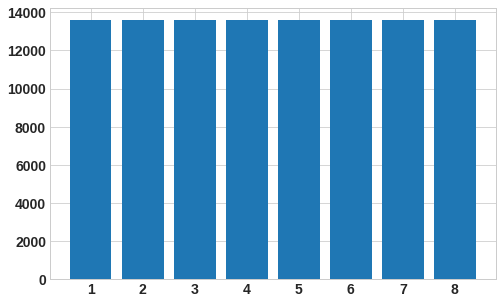

In [ ]:
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=110, min_samples_split=10, random_state=11)

pipe1 = Pipeline(steps=[
                        ("clf", clf1)
                        ])

scores = cross_val_score(pipe1, X_train, y_train, cv=15, scoring="accuracy")


with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=80, min_samples_split=10, random_state=11)

pipe2 = Pipeline(steps=[
                        ('scaler', StandardScaler()),
                        ("clf", clf2)
                        ])

scores = cross_val_score(pipe2, X_train, y_train, cv=20, scoring="accuracy")


with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

In [64]:
clf3 = RandomForestClassifier(random_state=11)

pipe3 = Pipeline(steps=[
                        ('encoder', encode_pipeline),
                        ("clf", clf3)
                        ])

scores = cross_val_score(pipe3, X_train, y_train, cv=10, scoring="accuracy")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

CV scores: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
Estimated F1 Score: nan +/- nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

In [ ]:
# Fit/predict
clf4 = ExtraTreesClassifier()
clf4 = clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(18, 15))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["class_1", "class_2", "class_3", "class_4", "class_5", "class_6", "class_7", "class_8",],
)

cmp.plot(ax=ax)
plt.show();

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
'''
# Don't have to set `multi_class` argument if used with OVOClassifier
clf5 = OneVsOneClassifier(estimator=GaussianProcessClassifier())
clf5 = clf5.fit(X_train, y_train)

# Print the number of estimators created
print(len(clf5.estimators_))

# Failed even with GPU and High RAM
'''

In [ ]:
# Fit/predict
clf4 = GradientBoostingClassifier(n_estimators=100, max_depth = 10000, learning_rate = 0.01)
clf4 = clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
print(classification_report(y_test, y_pred))

In [82]:
# Fit/predict
clf6 = RandomForestClassifier(max_depth= 800, min_samples_leaf=50, min_samples_split= 50, n_estimators= 80)
rfclassifier_model = make_pipeline(cat_pipe, clf6)
rfclassifier_model = rfclassifier_model.fit(X_train, y_train)
y_pred = rfclassifier_model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           1       0.26      0.22      0.24       212
           2       0.61      0.14      0.22      1012
           3       0.00      0.00      0.00       249
           4       0.00      0.00      0.00       588
           5       0.89      0.00      0.01      1680
           6       0.37      0.58      0.45      3709
           7       0.50      0.00      0.00      2184
           8       0.65      0.92      0.76      8181

    accuracy                           0.55     17815
   macro avg       0.41      0.23      0.21     17815
weighted avg       0.56      0.55      0.46     17815



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
#Save to file in the current working directory
pkl_filename = "rfclassifier_model.pkl"
with open (pkl_filename, 'wb') as file:
  pickle.dump(rfclassifier_model, file)
#Load from file
with open (pkl_filename, 'rb' ) as file:
  pickle_model = pickle.load(file)

In [ ]:
# Fit/predict
clf7 = XGBClassifier(learning_rate= 0.05, max_depth= 500, n_estimators= 100)
xgbclassfier_model = make_pipeline(cat_pipe, clf7)

xgbclassfier_model = xgbclassfier_model.fit(X_train, y_train)
y_pred = xgbclassfier_model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Save to file in the current working directory
pkl_filename = "xgbclassfier_model.pkl"
with open (pkl_filename, 'wb') as file:
  pickle.dump(xgbclassfier_model, file)
#Load from file
with open (pkl_filename, 'rb' ) as file:
  pickle_model = pickle.load(file)

In [ ]:
dftest = pd.read_csv('classfication_containerized_test.csv')

In [ ]:
# make predictions on the test set
y_predtest_rf = rfclassifier_model.predict(dftest)
print(y_predtest_rf)

y_predtest_xgb = xgbclassfier_model.predict(dftest)
print(y_predtest_xgb)

In [ ]:
# Fit/predict
clf8 = SVC(kernel='linear')
clf8 = clf8.fit(X_train, y_train)
y_pred = clf8.predict(X_test)
print(classification_report(y_test, y_pred))